In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [4]:
for index, row in df.iterrows():
    if row['Country/Region'] == 'Others':
        a = row['Province/State']
        df.loc[index, 'Country/Region'] = a

In [5]:
cases = df.iloc[:,[1,-1]].groupby('Country/Region').sum()
mostrecentdate = cases.columns[0]
print('Total number of cases as of', mostrecentdate)

cases = cases.sort_values(by = mostrecentdate, ascending = False)
cases = cases[cases[mostrecentdate] >= 100]
cases

Total number of cases as of 3/3/20


,3/3/20
Country/Region,
Mainland China,80151
South Korea,5186
Italy,2502
Iran,2336
Diamond Princess cruise ship,706
Japan,293
France,204
Germany,196
Spain,165


In [9]:
def logistic(t, a, b, c, d):
    return c + (d - c)/(1 + a * np.exp(- b * t))

def exponential(t, a, b, c):
    return a * np.exp(b * t) + c

def plotCases(country):
    co = df[df['Country/Region'] == country].iloc[:,4:].T.sum(axis = 1)
    co = pd.DataFrame(co)
    co.columns = ['Cases']
    co = co.loc[co['Cases'] > 0]
    
    y = np.array(co['Cases'])
    x = np.arange(y.size)

    plt.figure(figsize=(10,5))
    plt.plot(x, y, 'ko', label="Original Data")
    
    logisticworked = False
    exponentialworked = False
    
    try:
        lpopt, lpcov = curve_fit(logistic, x, y)
        residuals = y - logistic(x, *lpopt)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        logisticr2 = 1 - (ss_res / ss_tot)  
        
        if logisticr2 > 0.9:
            plt.plot(x, logistic(x, *lpopt), 'b--', label="Logistic Curve Fit")
            print('\n** Based on Logistic Fit **\n')
            print('\tR^2:', logisticr2)
            print('\tDoubling Time: ', round(np.log(2)/lpopt[1],2), 'days')
            print('\tEstimated Total Cases: ', int(round(lpopt[3])))
            logisticworked = True
            
    except:
        pass
        
    try:
        epopt, epcov = curve_fit(exponential, x, y, bounds=([0,0,-100],[100,0.9,100]))
        residuals = y - exponential(x, *epopt)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        expr2 = 1 - (ss_res / ss_tot)
        
        if expr2 > 0.9:
            plt.plot(x, exponential(x, *epopt), 'r--', label="Exponential Curve Fit")
            print('\n** Based on Exponential Curve Fit **\n')
            print('\tR^2:', expr2)
            print('\tDoubling Time: ', round(np.log(2)/epopt[1],2), 'days')
            exponentialworked = True
            
    except:
        pass
            
    plt.title(country + ' COVID-19 Cases as of '+mostrecentdate, fontsize="x-large")
    plt.xlabel('Days')
    plt.ylabel('Total Cases')
    plt.legend(fontsize="x-large")
    plt.show()
    
    if logisticworked and exponentialworked:
        if logisticr2 > expr2:
            return np.log(2)/lpopt[1]
        else:
            return np.log(2)/epopt[1]
            
    if logisticworked:
        return np.log(2)/lpopt[1]
    
    if exponentialworked:
        return np.log(2)/epopt[1]


Mainland China

** Based on Logistic Fit **

	R^2: 0.993567584248
	Doubling Time:  3.24 days
	Estimated Total Cases:  81032


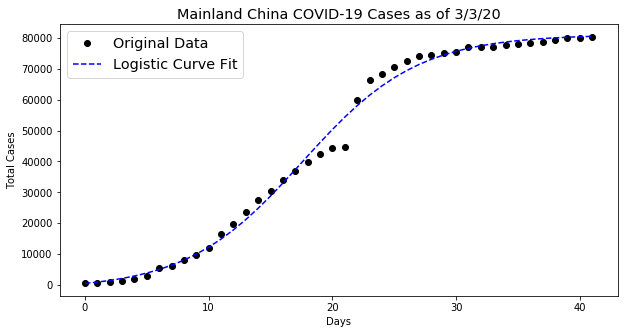



South Korea

** Based on Exponential Curve Fit **

	R^2: 0.990923418674
	Doubling Time:  3.06 days


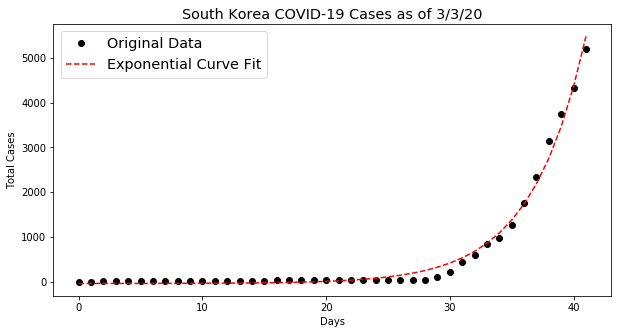



Italy

** Based on Exponential Curve Fit **

	R^2: 0.993046600249
	Doubling Time:  2.52 days


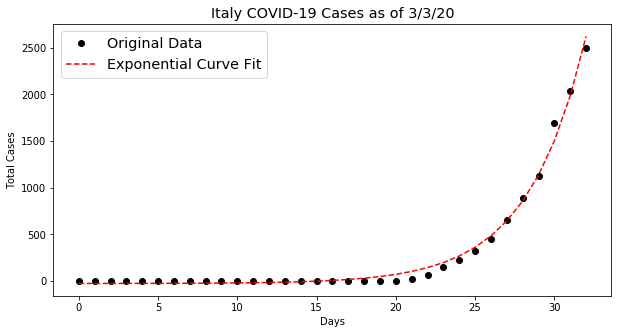



Iran

** Based on Logistic Fit **

	R^2: 0.99986691814
	Doubling Time:  1.46 days
	Estimated Total Cases:  24382

** Based on Exponential Curve Fit **

	R^2: 0.999804762566
	Doubling Time:  1.55 days


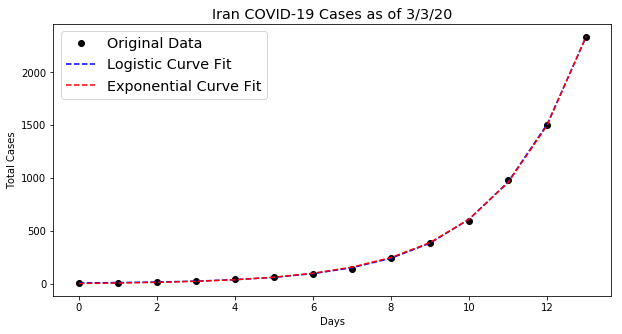



Diamond Princess cruise ship

** Based on Logistic Fit **

	R^2: 0.994667526792
	Doubling Time:  1.37 days
	Estimated Total Cases:  704


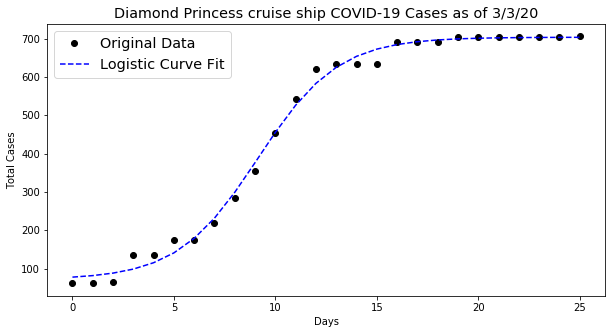



Japan

** Based on Logistic Fit **

	R^2: 0.993652019255
	Doubling Time:  3.71 days
	Estimated Total Cases:  393

** Based on Exponential Curve Fit **

	R^2: 0.985522655297
	Doubling Time:  7.47 days


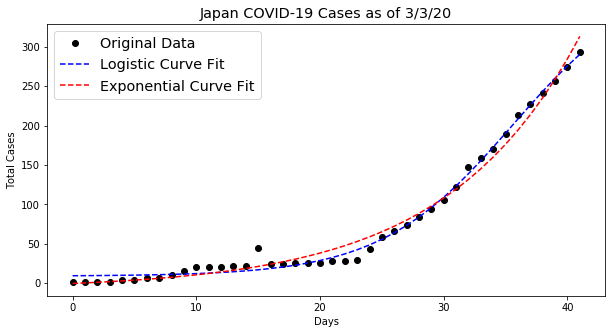



France

** Based on Exponential Curve Fit **

	R^2: 0.970250583036
	Doubling Time:  2.08 days


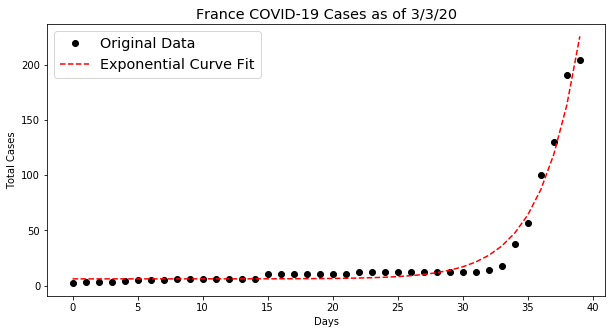



Germany

** Based on Exponential Curve Fit **

	R^2: 0.976820255196
	Doubling Time:  2.0 days


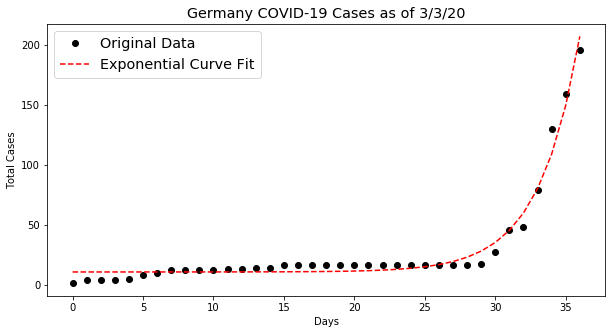



Spain

** Based on Exponential Curve Fit **

	R^2: 0.993032739475
	Doubling Time:  1.66 days


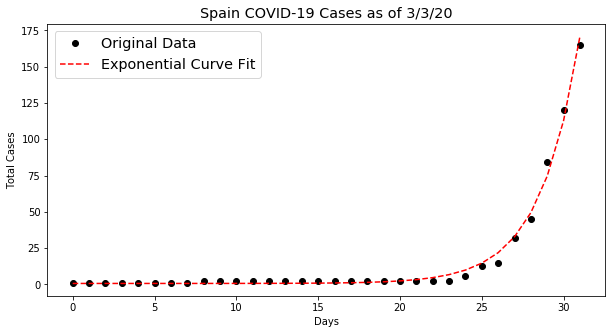



US

** Based on Exponential Curve Fit **

	R^2: 0.970718109087
	Doubling Time:  5.01 days


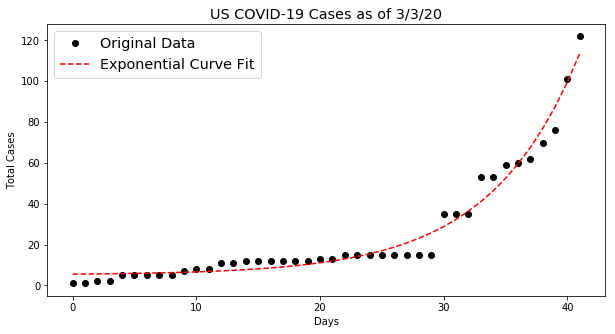



Singapore

** Based on Logistic Fit **

	R^2: 0.992220455369
	Doubling Time:  4.47 days
	Estimated Total Cases:  107

** Based on Exponential Curve Fit **

	R^2: 0.962937409621
	Doubling Time:  35.22 days


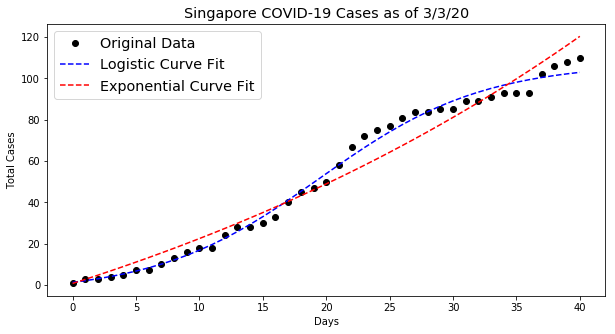



Hong Kong

** Based on Logistic Fit **

	R^2: 0.988930726241
	Doubling Time:  6.82 days
	Estimated Total Cases:  122

** Based on Exponential Curve Fit **

	R^2: 0.983079268046
	Doubling Time:  37.35 days


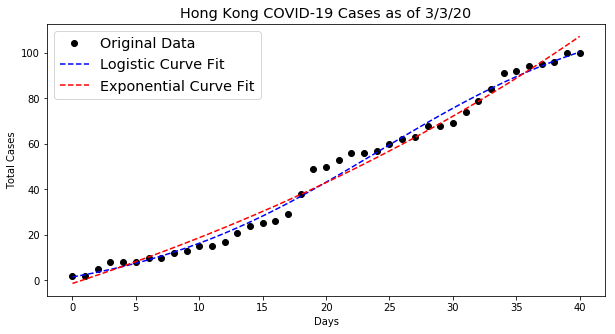

In [10]:
topcountries = cases.index[0:20]
doublingtime = []
countries = []
print();

for c in topcountries:
    print(c)
    a = plotCases(c)
    if a:
        countries.append(c)
        doublingtime.append(a)
    print('\n')

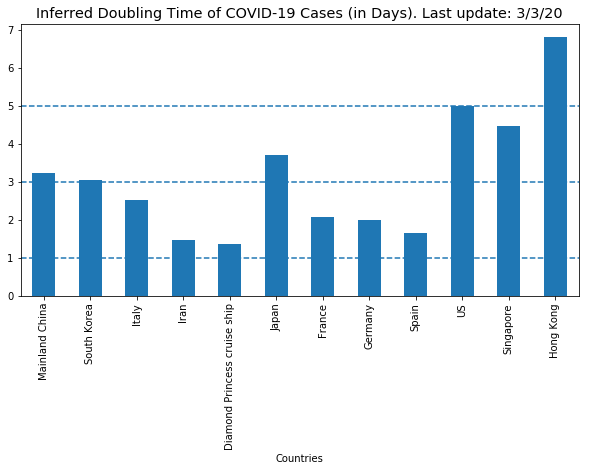

In [11]:
d = {'Countries': countries, 'Doubling Time': doublingtime}

dt = pd.DataFrame(data = d)
dt.plot.bar(x = 'Countries', y = 'Doubling Time', legend=False,figsize=(10,5));
plt.axhline(y=1, linestyle='--')
plt.axhline(y=3, linestyle='--')
plt.axhline(y=5, linestyle='--')
plt.title('Inferred Doubling Time of COVID-19 Cases (in Days). Last update: ' + mostrecentdate, fontsize="x-large")
plt.show()